In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

%matplotlib inline
sns.set_style('white')

## King County (Seattle) Housing Data

We'll be looking at King County housing data, and preparing the data for later analysis. I'll look at the data with a number of univariate and bivariate techniques, then run principle component analysis and pick some good features to bring into a regression later on.

https://www.kaggle.com/harlfoxem/housesalesprediction/data

In [2]:
housing = pd.read_csv('kc_house_data.csv')
housing.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df = housing.loc[(housing['zipcode']==98108) | (housing['zipcode']==98112),
    ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'yr_built', 'zipcode']
]

#The same dataframe, without zip, for correlation analysis.
df_nozip = df.loc[:, 'price':'yr_built']

Price will be our outcome variable. We'll look at 

**bedrooms:** Number of Bedrooms/House: numeric

**sqft_living:** Square footage of the home: numeric

**sqft_lot:** Square footage of the lot: numeric

**condition:** How good the condition is: numeric

**grade:** Overall grade given to the housing unit, based on King County grading system: numeric

**yr_built:** Built Year: numeric

**zipcode:** Zip: numeric


In [4]:
df.head(5)

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode
27,667000.0,3,1400,1581,5,8,1909,98112
113,329950.0,3,2080,5969,3,7,1971,98108
196,423000.0,4,1970,6480,5,7,1920,98108
234,475000.0,3,2480,5280,5,7,1947,98108
260,780000.0,3,1660,4400,3,8,1911,98112


In [5]:
df_nozip.describe()

,price,bedrooms,sqft_living,sqft_lot,condition,grade,yr_built
count,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,7.930671e+05,3.384615,2174.114286,5078.081319,3.470330,7.859341,1949.951648
std,5.874607e+05,1.100353,1023.622037,2797.889570,0.744065,1.263690,37.645370
min,9.000000e+04,1.000000,420.000000,520.000000,1.000000,5.000000,1900.000000
25%,3.800000e+05,3.000000,1460.000000,3620.000000,3.000000,7.000000,1919.000000
50%,6.000000e+05,3.000000,1960.000000,4800.000000,3.000000,8.000000,1941.000000
75%,1.035000e+06,4.000000,2625.000000,6000.000000,4.000000,9.000000,1993.000000
max,3.400000e+06,8.000000,7710.000000,30120.000000,5.000000,12.000000,2015.000000


/Users/maxcalabro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


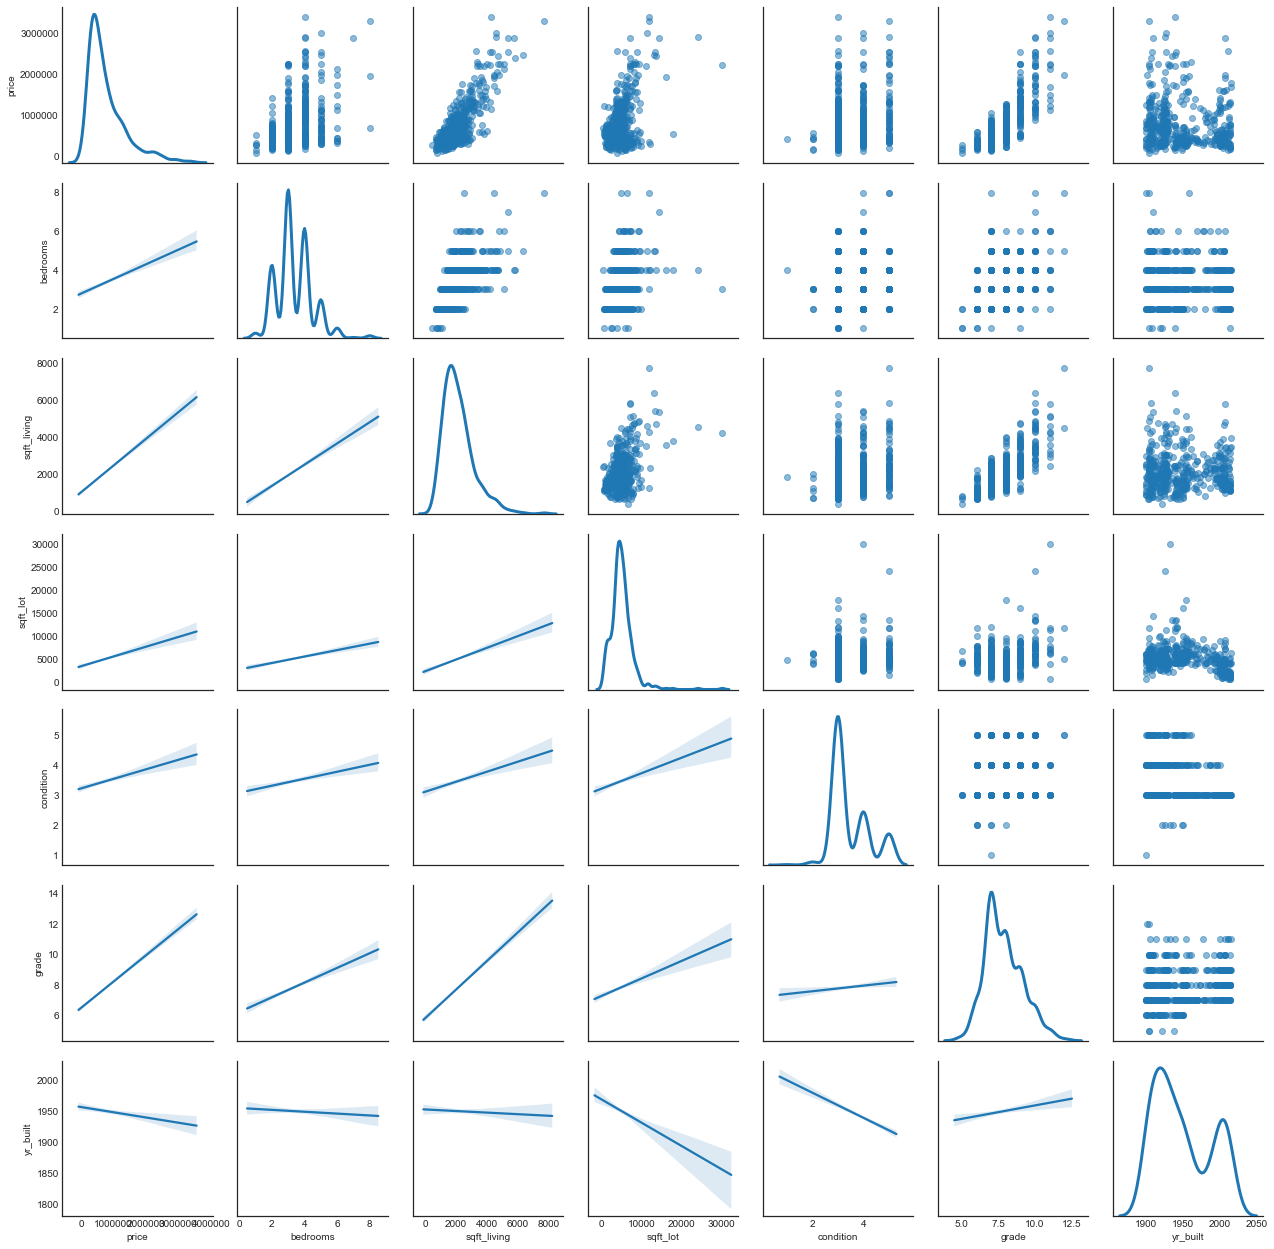

In [6]:
g = sns.PairGrid(df_nozip, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)

plt.show()

Comparing all the variables except Zip Code. Some correlations are fairly clear: Price is strongly dependent on bedrooms, sqft_living, and grade. Less so on yr_built and condition. These analyses depend on data being close to a normal distribution, so let's see if we're close, and the see the actual correlation values.

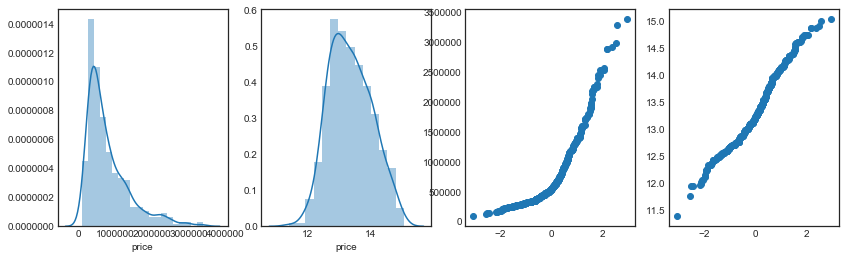

In [17]:
norm = sorted(np.random.normal(0, 1, 455))


f, ax = plt.subplots(figsize=(14,4))
plt.subplot(1, 4, 1)
sns.distplot(df.price)
plt.subplot(1, 4, 2)
sns.distplot(np.log(df.price))
plt.subplot(1, 4, 3)
plt.scatter(norm, sorted(df.price))
plt.subplot(1, 4, 4)
plt.scatter(norm, sorted(np.log(df.price)))
plt.show()

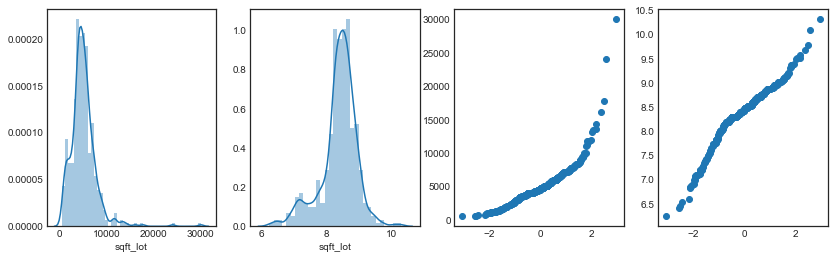

In [23]:
f, ax = plt.subplots(figsize=(14,4))
plt.subplot(1, 4, 1)
sns.distplot(df.sqft_lot)
plt.subplot(1, 4, 2)
sns.distplot(np.log(df.sqft_lot))
plt.subplot(1, 4, 3)
plt.scatter(norm, sorted(df.sqft_lot))
plt.subplot(1, 4, 4)
plt.scatter(norm, sorted(np.log(df.sqft_lot)))
plt.show()

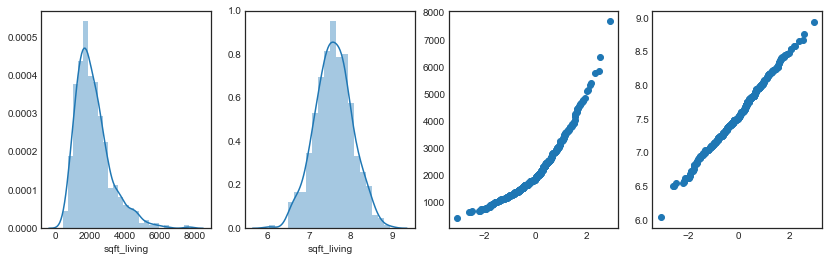

In [22]:
f, ax = plt.subplots(figsize=(14,4))
plt.subplot(1, 4, 1)
sns.distplot(df.sqft_living)
plt.subplot(1, 4, 2)
sns.distplot(np.log(df.sqft_living))
plt.subplot(1, 4, 3)
plt.scatter(norm, sorted(df.sqft_living))
plt.subplot(1, 4, 4)
plt.scatter(norm, sorted(np.log(df.sqft_living)))
plt.show()

Taking the log of some of these variables might help out a bit later on. (I didn't really get into this too much - let's talk about it)

                price  bedrooms  sqft_living  sqft_lot  condition     grade  \
price        1.000000  0.403006     0.824125  0.447125   0.249731  0.802807   
bedrooms     0.403006  1.000000     0.613684  0.276926   0.171352  0.420751   
sqft_living  0.824125  0.613684     1.000000  0.465139   0.227394  0.757385   
sqft_lot     0.447125  0.276926     0.465139  1.000000   0.193618  0.255488   
condition    0.249731  0.171352     0.227394  0.193618   1.000000  0.107995   
grade        0.802807  0.420751     0.757385  0.255488   0.107995  1.000000   
yr_built    -0.130832 -0.043791    -0.034259 -0.278434  -0.395591  0.144363   

             yr_built  
price       -0.130832  
bedrooms    -0.043791  
sqft_living -0.034259  
sqft_lot    -0.278434  
condition   -0.395591  
grade        0.144363  
yr_built     1.000000  


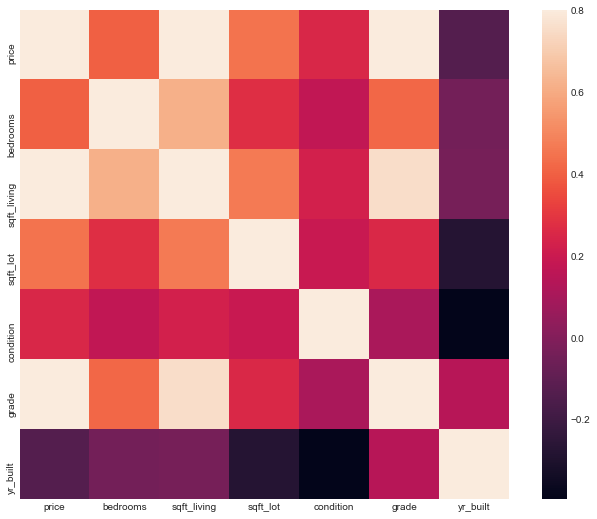

In [9]:
corrmat = df_nozip.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

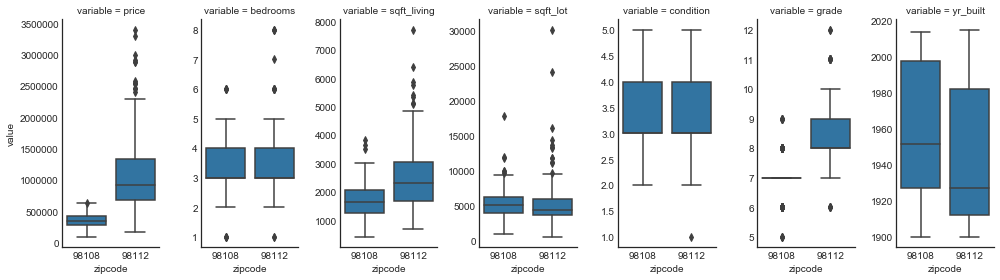

In [10]:
df_long = df
df_long = pd.melt(df_long, id_vars=['zipcode'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5, sharey=False)
g = g.map(sns.boxplot, "zipcode", "value")
plt.show()

Moving on to PCA -- let's reduce the number of features. Since Price will be our outcome variable, we won't include in the dimension reduction analysis.

In [25]:
df_noprice = df.loc[:, 'bedrooms':'yr_built']
df_noprice.sqft_living = np.log(df_noprice.sqft_living)
df_noprice.sqft_lot = np.log(df_noprice.sqft_lot)

In [26]:
X = StandardScaler().fit_transform(df_noprice)
Xt = X.T
Cx = np.cov(Xt)

In [27]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [28]:
# Inspecting the eigenvalues and eigenvectors. From example notebook.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 6).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.48732547]
 [ 0.56815491]
 [ 0.36945539]
 [ 0.26295338]
 [ 0.4635384 ]
 [-0.1385795 ]]
Eigenvalue 1: 2.5127736714480093
----------------------------------------
Eigenvector 2: 
[[ 0.11776974]
 [ 0.21773977]
 [-0.37789411]
 [-0.44328593]
 [ 0.36593764]
 [ 0.68227777]]
Eigenvalue 2: 1.5650805044926763
----------------------------------------
Eigenvector 3: 
[[ 0.27867896]
 [-0.7827644 ]
 [ 0.13280853]
 [ 0.05144085]
 [ 0.53751072]
 [ 0.02039368]]
Eigenvalue 3: 0.1758917208290779
----------------------------------------
Eigenvector 4: 
[[-0.15687473]
 [ 0.02891742]
 [-0.59261356]
 [ 0.761129  ]
 [ 0.19398851]
 [ 0.08008985]]
Eigenvalue 4: 0.7830281110684706
----------------------------------------
Eigenvector 5: 
[[-0.79027636]
 [ 0.11228879]
 [ 0.23406397]
 [-0.10705327]
 [ 0.53036133]
 [-0.12379428]]
Eigenvalue 5: 0.5466973859790306
----------------------------------------
Eigenvector 6: 
[[-0.14776947]
 [-0.06020216]
 [ 0.54505402]
 [ 0.37540538]
 [-0.2083011 ]
 [ 0

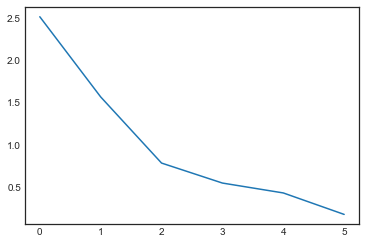

In [29]:
plt.plot(sorted(eig_val_cov, reverse=True))
plt.show()

Based on this analysis, Eigenvector 1 from PCA contains the most information, and includes the variables that trend together: number of bedrooms, square footage, grade. Basically, this is a "Size" variable. EV2 also contains a lot of information, and is closely related to condition and year built. This is a "How Nice" variable. Since location isn't included in this analysis (zip code isn't a useful format for analysis), this makes sense. When buying a house, the three most general questions are: Where? How big? Is it nice?

Moving forward in the analysis, I would probably just stick with these two principle components: EV1 and EV2. This makes sense using either the "All eigenvalues > 1" method, or the elbow method based on the plot. It gives us the information of 4 of our original variables (out of 6, for a total of 68% of the information) for the price of 2. 

**10 Possible Features**

I already suspect PCA will have given us the best options, but what else could we do? 

-Average sqft_living and sqft_lot. These variables get at similar information, so they could be combined.

-Combine the MOST strongly correlated variables. This would mean combining bedrooms and grade with sqft_living. 

-Take the two best eigenvalues, as above. This gives us 68% of the information.

-Add a third eigenvalue to increase that to 78% of the information.

-Taking the log of sqft_living and sqft_lot.